In [1]:
import os  
import tensorflow as tf 
import pandas as pd  
import matplotlib.pyplot as plt 
import numpy as np
from numpy import random


In [ ]:
'''
Submitted by - Pakhi Agarwal

IST 597: Foundations of Deep Learning
Problem 3: Multivariate Regression & Classification

@author - Alexander G. Ororbia II and Ankur Mali

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <http://www.gnu.org/licenses/>.
'''

In [2]:
# NOTE: you will need to tinker with the meta-parameters below yourself (do not think of them as defaults by any means)
# meta-parameters for program
#Change variables to tf.constant or tf.Variable whenever needed
trial_name = 'p6_reg0' # will add a unique sub-string to output of this program
degree = 6 # p, degree of model (LEAVE THIS FIXED TO p = 6 FOR THIS PROBLEM)
beta = 1.0 # regularization coefficient
alpha = 1.5 # step size coefficient
eps = 0.00001 # controls convergence criterion
n_epoch = 150 # number of epochs (full passes through the dataset)

# begin simulation

In [3]:
def sigmoid(z):
    # WRITEME: write your code here to complete the routine
        
    sig = 1/(1 + tf.exp(-z))
    return sig



In [4]:
def predict(X, theta):  
    # WRITEME: write your code here to complete the routine
    b, w = theta
    p = sigmoid(b + tf.matmul(X, w))
    q = np.asarray(p.eval() > [0.5],np.float64)
    r= tf.convert_to_tensor(q,dtype=np.float64)
    return r.eval().astype(float)
    

In [5]:
def regress(X, theta):
    # WRITEME: write your code here to complete the routine
    b, w = theta
    p = sigmoid(b + tf.matmul(X, w))
    return p
    

In [6]:
def bernoulli_log_likelihood(p, y):
    # WRITEME: write your code here to complete the routine
    log_like = -tf.matmul(tf.transpose(y), tf.log(sig)) - tf.matmul(tf.transpose(1 - y), tf.log(1 - sig))
    return log_like


In [7]:
def computeCost(X, y, theta, beta): # loss is now Bernoulli cross-entropy/log likelihood
    # WRITEME: write your code here to complete the routine
    b, w = theta
    q = X.shape[0]
    C = sigmoid(tf.matmul(X, w) + b)
    cost = (tf.reduce_sum((y * tf.log(C)) + (1 - y) * tf.log(1 - C)) / (-q)) + (beta * tf.reduce_sum(w ** 2)) / (2.0 * q)
    
    return cost


In [8]:
def computeGrad(X, y, theta, beta): 
    # WRITEME: write your code here to complete the routine (
    # NOTE: you do not have to use the partial derivative symbols below, they are there to guide your thinking)
    
    ###########################################################
    b,w = theta

    dL_dfy = None # derivative w.r.t. to model output units (fy)

    C = sigmoid(tf.matmul(X, w) + b)
    q = X.shape[0]
    
    dL_db = tf.reduce_sum(C - y) / q  # derivative w.r.t. model weights w
    
    d = tf.matmul(tf.transpose(X), (C - y)) / q

    dL_dw = d + (w * beta) / q # derivative w.r.t model bias b
    nabla = (dL_db, dL_dw) # nabla represents the full gradient
    return nabla

In [9]:
path = os.getcwd() + '/prob3.dat'  
data2 = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted'])



In [10]:
positive = data2[data2['Accepted'].isin([1])]  
negative = data2[data2['Accepted'].isin([0])]
#TODO
#Convert positive and negative samples into tf.Variable 
##########################################################

pos = tf.Variable(positive)
neg = tf.Variable(negative)

##########################################################


x1 = data2['Test 1']  
x2 = data2['Test 2']
#Convert x1 and x2 to tensorflow variables

##########################################

xx1 = tf.Variable(x1)
xx2 = tf.Variable(x2)

##########################################


In [11]:
# apply feature map to input features x1 and x2
cnt = 0

for i in range(1, degree+1):  
    for j in range(0, i+1):
        data2['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)
        cnt += 1

data2.drop('Test 1', axis=1, inplace=True)  
data2.drop('Test 2', axis=1, inplace=True)

# set X and y
cols = data2.shape[1]  
X2 = data2.iloc[:,1:cols]  
y2 = data2.iloc[:,0:1]

In [12]:
# convert to numpy arrays and initalize the parameter array theta
X2 = np.array(X2.values)  
y2 = np.array(y2.values)  

random.seed(1611189)
w0 = random.rand(27,1)
b0 = random.rand(1, 1)

w = tf.constant(w0, dtype=tf.float64)
b = tf.constant(b0, dtype=tf.float64)
theta = (b, w)

#TODO
#Convert all numpy variables into tensorflow variables
i = 0
halt=0
cost=[]

In [13]:
#Initialize graph and all variables
with tf.Session() as sess:
    while i < n_epoch and halt == 0:
        dL_db, dL_dw = computeGrad(X2, y2, theta, beta)
        #use feeddict to pass variables to pass holder
        b = theta[0]
        w = theta[1]
         
        # update rules go here...
        # WRITEME: write your code here to perform a step of gradient descent & record anything else desired for later
        ######################################
        b = b - alpha * dL_db
        w = w - alpha * dL_dw
        
        theta = (b, w)
        
        bb = b.eval()
        ww = w.eval()
        #####################################
      
        L0 = computeCost(X2, y2, theta, beta)
        L = L0.eval()
    # WRITEME: write code to perform a check for convergence (or simply to halt early)
        
        
        print(" {0} L = {1}".format(i,L))
        
        if cost and cost[-1] - L < eps:
            break
    
        cost.append(L)
        i += 1
         
# print parameter values found after the search
#Save everything into saver object in tensorflow
#Visualize using tensorboard

    predictions = predict(X2, theta)

# WRITEME: write your code here calculate your actual classification error (using the "predictions" variable)
    err = tf.reduce_sum(tf.abs(predictions - y2)) / float(len(y2))

    print 'Error = {0}%'.format(err.eval() * 100.)

 0 L = 1.07416722409
 1 L = 0.932000425926
 2 L = 0.853357707341
 3 L = 0.805378824473
 4 L = 0.771572534458
 5 L = 0.745401693032
 6 L = 0.724207808891
 7 L = 0.706652414097
 8 L = 0.691885358108
 9 L = 0.679292091118
 10 L = 0.668408584546
 11 L = 0.658881658164
 12 L = 0.650442721085
 13 L = 0.642887555459
 14 L = 0.636060457396
 15 L = 0.62984201417
 16 L = 0.624139865908
 17 L = 0.618881819069
 18 L = 0.614010754525
 19 L = 0.609480876657
 20 L = 0.605254952099
 21 L = 0.601302273992
 22 L = 0.597597156542
 23 L = 0.594117817072
 24 L = 0.590845541555
 25 L = 0.587764057981
 26 L = 0.584859062598
 27 L = 0.582117858983
 28 L = 0.57952908073
 29 L = 0.577082476406
 30 L = 0.574768741096
 31 L = 0.572579382998
 32 L = 0.570506616575
 33 L = 0.56854327593
 34 L = 0.566682743738
 35 L = 0.564918892199
 36 L = 0.563246033415
 37 L = 0.561658877181
 38 L = 0.560152494697
 39 L = 0.558722287059
 40 L = 0.557363957634
 41 L = 0.556073487646
 42 L = 0.554847114441
 43 L = 0.553681312008
 4

In [14]:
sess = tf.InteractiveSession()
predictions = predict(X2, theta)

# WRITEME: write your code here calculate your actual classification error (using the "predictions" variable)
err = tf.reduce_sum(tf.abs(predictions - y2)) / float(len(y2))

print 'Error = {0}%'.format(err.eval() * 100.)


Error = 16.9491525424%


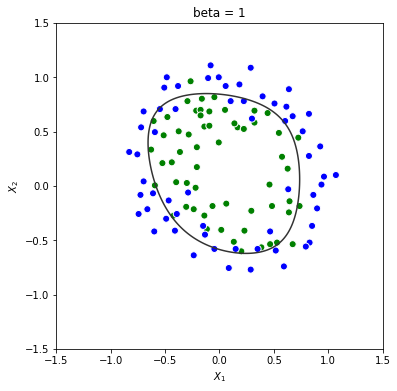

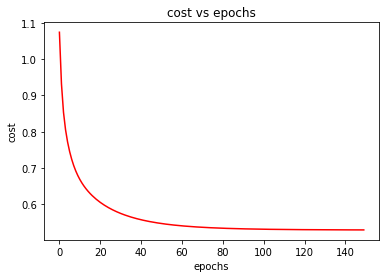

In [15]:
# make contour plot
xx, yy = np.mgrid[-1.2:1.2:.01, -1.2:1.2:.01]
xx1 = xx.ravel()
yy1 = yy.ravel()
grid = np.c_[xx1, yy1]
grid_nl = []
# re-apply feature map to inputs x1 & x2
#Convert the below feature map into tensorflow environment

for i in range(1, degree+1):  
    for j in range(0, i+1):
        feat = np.power(xx1, i-j) * np.power(yy1, j)
        if (len(grid_nl) > 0):
            grid_nl = np.c_[grid_nl, feat]
        else:
            grid_nl = feat
probs = regress(grid_nl, theta).eval().reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)

y22 = y2[:,0]

colors = np.array(["blue", "green"])

ax.scatter(x1, x2, c=colors[y22], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-1.5, 1.5), ylim=(-1.5, 1.5),
       xlabel="$X_1$", ylabel="$X_2$")
# WRITEME: write your code here to save plot to disk (look up documentation/inter-webs for matplotlib)

##############################################
plt.title("beta = 1")
plt.savefig(os.getcwd() + '/DLAssign1Problem3/scatter_plot_beta_')
plt.show()

plt.figure()

plt.xlabel("epochs")
plt.ylabel("cost")
plt.title("cost vs epochs")

plt.plot(cost, 'r')
plt.savefig(os.getcwd() + '/DLAssign1Problem3/cost vs epoch')


plt.show()

#############################################
